In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use(
    'ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [6]:
df = pd.read_csv('../../Data/diemthi2019.csv', header=0, index_col=0)
df.head()

,Dia,GDCD,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Su,Toan,Van,sbd
0,7.75,8.75,NaN,NaN,N1,7.6,NaN,8.25,8.2,8.00,24008611
1,NaN,NaN,4.5,8.25,N1,8.0,6.0,NaN,8.6,6.17,51000032
2,4.25,5.75,NaN,NaN,NaN,NaN,NaN,4.00,5.2,4.75,51000005
3,4.75,5.00,NaN,NaN,NaN,NaN,NaN,2.25,4.4,4.50,51000021
4,8.25,7.50,NaN,NaN,N1,4.4,NaN,7.75,5.8,6.00,51000013


In [14]:
df.groupby(by = 'Ma_mon_ngoai_ngu').count()[['Ngoai_ngu']]

,Ngoai_ngu
Ma_mon_ngoai_ngu,
N1,726064
N2,148
N3,646
N4,801
N5,81
N6,773


## Dataset overview

In [122]:
df.shape

(811851, 11)

### Cái nhìn tổng quan về số lượng dữ liệu các trường bị thiếu

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811851 entries, 0 to 811850
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Dia               535897 non-null  float64
 1   GDCD              470905 non-null  float64
 2   Hoa               295544 non-null  float64
 3   Li                292166 non-null  float64
 4   Ma_mon_ngoai_ngu  728513 non-null  object 
 5   Ngoai_ngu         728513 non-null  float64
 6   Sinh              291199 non-null  float64
 7   Su                542729 non-null  float64
 8   Toan              807762 non-null  float64
 9   Van               799208 non-null  float64
 10  sbd               811851 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 74.3+ MB


### Chọn nhiều cột

In [124]:
df[['Toan', 'Li', 'Hoa']]

,Toan,Li,Hoa
0,8.2,NaN,NaN
1,8.6,8.25,4.5
2,5.2,NaN,NaN
3,4.4,NaN,NaN
4,5.8,NaN,NaN
...,...,...,...
811846,4.4,NaN,NaN
811847,5.2,3.75,4.5
811848,2.8,NaN,NaN
811849,6.2,NaN,NaN


### Số lượng các bản ghi tương ứng giống nhau (tương tự như Counter)

In [125]:
df['Toan'].value_counts().sort_index(ascending=False)

10.0       12
9.8       163
9.6       644
9.4      1460
9.2      2578
9.0      4393
8.8      6441
8.6      9293
8.4     12270
8.2     15838
8.0     19701
7.8     22988
7.6     25911
7.4     28373
7.2     29877
7.0     30996
6.8     31416
6.6     31387
6.4     31644
6.2     31486
6.0     31502
5.8     31476
5.6     31552
5.4     31053
5.2     29904
5.0     29194
4.8     27892
4.6     26442
4.4     25279
4.2     23606
4.0     22469
3.8     21108
3.6     19868
3.4     19009
3.2     18298
3.0     17068
2.8     15703
2.6     13938
2.4     11446
2.2      8962
2.0      6500
1.8      4081
1.6      2327
1.4      1217
1.2       547
1.0       227
0.8        73
0.6        36
0.4         6
0.2         1
0.0       107
Name: Toan, dtype: int64

### Vẽ biểu đồ thể hiện

<AxesSubplot:>

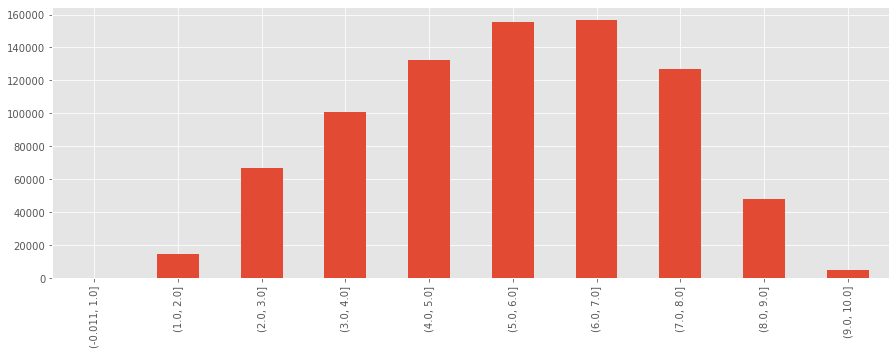

In [126]:
df['Toan'].value_counts(bins = 10).sort_index(ascending=True).plot(kind='bar')

### Tính điểm KHTN, KHXH

In [127]:
df['KHTN'] = round((df['Sinh'] + df['Li'] + df['Hoa'])/3, 2)
df['KHXH'] = round((df['Su'] + df['Dia'] + df['GDCD'])/3, 2)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811851 entries, 0 to 811850
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Dia               535897 non-null  float64
 1   GDCD              470905 non-null  float64
 2   Hoa               295544 non-null  float64
 3   Li                292166 non-null  float64
 4   Ma_mon_ngoai_ngu  728513 non-null  object 
 5   Ngoai_ngu         728513 non-null  float64
 6   Sinh              291199 non-null  float64
 7   Su                542729 non-null  float64
 8   Toan              807762 non-null  float64
 9   Van               799208 non-null  float64
 10  sbd               811851 non-null  int64  
 11  KHTN              286429 non-null  float64
 12  KHXH              470826 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 86.7+ MB


In [129]:
df[df['Toan'] <= 1].shape

(450, 13)

### Điểm trung bình môn Toán

In [130]:
df['Toan'].mean()

5.5737479604139715

### Danh sách học sinh bị điểm liệt

In [131]:
mon_thi = ['Dia', 'GDCD', 'Hoa', 'Li', 'Ngoai_ngu', 'Sinh', 'Su', 'Toan', 'Van']
df['is_pass'] = sum([df[index] <= 1 for index in mon_thi]) == 0
df[df.is_pass == 0]

,Dia,GDCD,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Su,Toan,Van,sbd,KHTN,KHXH,is_pass
629,6.25,NaN,NaN,NaN,NaN,NaN,NaN,3.50,NaN,1.00,51000649,NaN,NaN,False
1469,3.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2.0,3.25,51001484,NaN,NaN,False
4022,3.50,5.50,NaN,NaN,N1,1.0,NaN,4.50,3.4,2.25,28026400,NaN,4.50,False
4893,0.00,NaN,NaN,NaN,NaN,NaN,NaN,4.00,2.6,2.50,28027269,NaN,NaN,False
4928,5.50,7.25,NaN,NaN,N1,0.6,NaN,4.00,2.6,6.50,28027314,NaN,5.58,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809765,6.50,NaN,NaN,NaN,NaN,NaN,NaN,4.50,1.0,2.00,26017016,NaN,NaN,False
811572,4.00,7.25,NaN,NaN,N1,1.0,NaN,4.25,4.2,3.00,26018826,NaN,5.17,False
811676,NaN,NaN,3.5,1.00,N1,4.0,3.25,NaN,5.8,6.50,26018937,2.58,NaN,False
811683,NaN,NaN,3.5,0.75,N1,3.2,4.00,NaN,3.8,4.00,26018935,2.75,NaN,False


In [168]:
diem_khoi_A = df['Toan'] + df['Li'] + df['Hoa']
diem_khoi_B = df['Li'] + df['Hoa'] + df['Sinh']

Diem TB khoi A: 17.72


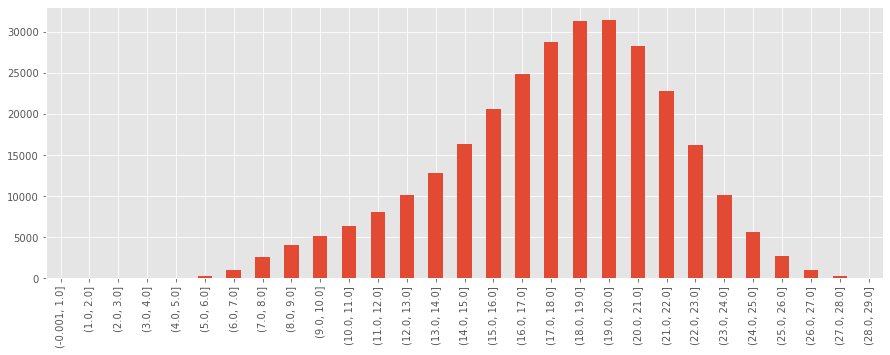

In [172]:
diem_khoi_A.value_counts(bins = np.arange(30)).sort_index().plot(kind='bar')
print('Diem TB khoi A: ' + str(round(diem_khoi_A.mean(), 2)))

### Số lượng thí sinh trên 27 điểm

In [184]:
diem_khoi_A_27 = diem_khoi_A[diem_khoi_A > 27].count()
tong_thi_sinh_khoi_A =diem_khoi_A.count()
print("số lượng thí sinh từ 27 điểm trở lên là: {0} chiếm {1} %".format(diem_khoi_A_27, round(diem_khoi_A_27*100/tong_thi_sinh_khoi_A, 2)))

số lượng thí sinh từ 27 điểm trở lên là: 295 chiếm 0.1 %


### Số lượng thí sinh từ  24 - 27 điểm

In [206]:
diem_khoi_A_24 = diem_khoi_A[(24 < diem_khoi_A) & (diem_khoi_A < 27)].count()
tong_thi_sinh_khoi_A =diem_khoi_A.count()
print("số lượng thí sinh từ 24 - 27 điểm trở lên là: {0} chiếm {1} %".format(diem_khoi_A_24, round(diem_khoi_A_24*100/tong_thi_sinh_khoi_A, 2)))

số lượng thí sinh từ 24 - 27 điểm trở lên là: 9343 chiếm 3.21 %


In [252]:
df['Diem_khoi_A'] = diem_khoi_A
df[['sbd', 'Toan', 'Li', 'Hoa', 'Diem_khoi_A']].dropna().sort_values('Diem_khoi_A', ascending = False)

,sbd,Toan,Li,Hoa,Diem_khoi_A
6355,28028736,9.8,9.25,10.00,29.05
656063,28018525,9.8,9.50,9.50,28.80
489147,15000027,9.8,9.25,9.75,28.80
346036,1068360,10.0,9.25,9.50,28.75
88483,28015875,9.6,9.50,9.50,28.60
...,...,...,...,...,...
547122,63005112,0.0,0.00,0.00,0.00
415120,59000772,0.0,0.00,0.00,0.00
415382,59001027,0.0,0.00,0.00,0.00
415723,59001372,0.0,0.00,0.00,0.00


In [10]:
Data_test = """
A: 10000
B: 200000
ádasdasd
C: 111000
ádas
A: 10001
B: 200020
C: 111030
A: 10020
B: 200100
C: 111200

"""

In [12]:
print(Data_test)


A: 10000
B: 200000
ádasdasd
C: 111000
ádas
A: 10001
B: 200020
C: 111030
A: 10020
B: 200100
C: 111200




In [19]:
import re

pattern = '(A: .*)\n(B:.*)|(C: .*)'
data = re.findall(pattern, Data_test)

In [20]:
data

[('A: 10000', 'B: 200000', ''),
 ('', '', 'C: 111000'),
 ('A: 10001', 'B: 200020', ''),
 ('', '', 'C: 111030'),
 ('A: 10020', 'B: 200100', ''),
 ('', '', 'C: 111200')]

In [21]:
Data = ['A: 10000', 'B: 200000', 'sdasdas', 'C: 111000', 'A: 10000', 'B: 200000', 'C: 2000']

In [22]:
log = '2021-01-19 06:55:48,774 INFO com.bgt.BGTClient [qtp1013312187-28] msisdn = 0903191894 , newCustomer content : {"result":"true","id":"121528879","pass":"3678737645"}'
log.split(' ')

['2021-01-19',
 '06:55:48,774',
 'INFO',
 'com.bgt.BGTClient',
 '[qtp1013312187-28]',
 'msisdn',
 '=',
 '0903191894',
 ',',
 'newCustomer',
 'content',
 ':',
 '{"result":"true","id":"121528879","pass":"3678737645"}']